<a href="https://colab.research.google.com/github/thaohung13/AI_W11_14_4_2023/blob/main/CIFAR10(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Flatten, Convolution2D, Conv2D, MaxPooling2D, Normalization, LeakyReLU, BatchNormalization, Activation, Dropout
from keras.utils import to_categorical #Onehot encoding convert
from keras import optimizers
from keras.optimizers import SGD
from keras import losses
import matplotlib.pyplot as plt

In [18]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [19]:
x_train=x_train.astype('float32')/255 #chia de ve gtri 0/1
x_test=x_test.astype('float32')/255 #chia de ve gtri 0/1
print(x_test.shape,x_train.shape)

(10000, 32, 32, 3) (50000, 32, 32, 3)


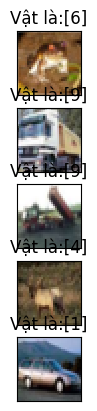

In [20]:
for i in range(5):
  plt.subplot(5,1,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Vật là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [21]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape,y_test.shape)

(50000, 10) (10000, 10)


In [22]:
from keras import Sequential, Model
from keras import optimizers
from keras import losses
from keras.layers import Activation,Dropout,Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam, SGD
import numpy as np

batch_size = 64
epochs = 20
classes = 10

# bo CNN
# co ba lan tich chap 
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#--------------
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# bo ANN
model.add(Flatten()) # tao ra mot vetor phang
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

sgd=SGD(lr=0.1,decay=1e-6,
        momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
train = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5705 - accuracy: 0.7984
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5652 - accuracy: 0.8014
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5599 - accuracy: 0.8007
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5609 - accuracy: 0.8002
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5480 - accuracy: 0.8066
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5367 - accuracy: 0.8071
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5354 - accuracy: 0.8094
Epoch 8/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5327 - accuracy: 0.8110
Epoch 9/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5198 - accuracy: 0.8160
Epoch 10/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5224 - accuracy: 0.8147

In [27]:
model.save('CNN_CIFA10.h5')  #lưu file

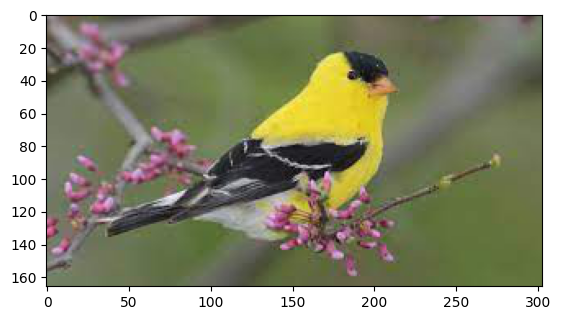

In [28]:
model10 = load_model('CNN_CIFA10.h5')  
img = plt.imread('download.jpg')
plt.imshow(img)
plt.show()

In [29]:
X_train = x_train.reshape(50000,32*32*3)  #chỉnh lại kích thước số dữ liệu đầu vào 
X_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

X_test = x_test.reshape(10000,32*32*3)
X_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [30]:

from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train, 10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(50000, 10, 10)
(10000, 10, 10)


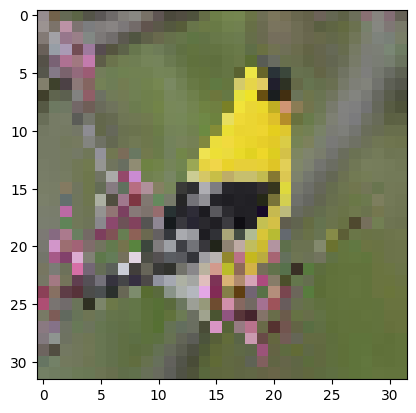

1/1 [==============================] - 0s 239ms/step
2
Label:  bird


In [31]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('download.jpg', target_size = (32,32))  #target_size: chỉnh kích thước ảnh mong muốn

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = img_to_array(img)
img = img.reshape(1, 32,32,3)
img = img.astype('float32')
img = img / 255

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img),axis = -1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])